In [2]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

identifiers  = ['3-Methylheptane', 'Aspirin', 'Diethylsulfate', 'Diethyl sulfate', '50-78-2', 'Adamant']

for ids in identifiers :
    print(ids, CIRconvert(ids))


3-Methylheptane CCCCC(C)CC
Aspirin CC(=O)Oc1ccccc1C(O)=O
Diethylsulfate CCO[S](=O)(=O)OCC
Diethyl sulfate CCO[S](=O)(=O)OCC
50-78-2 CC(=O)Oc1ccccc1C(O)=O
Adamant Did not work


In [4]:
# pd load noncanonical_AAs.csv
import pandas as pd

df = pd.read_csv('noncanonical_AAs.csv')
list(df['IUPAC Name'])


['(2R)-2-amino-3-selanylpropanoic acid',
 'N6-[[(2R,3R)-3-methyl-3,4-dihydro-2H-pyrrol-2-yl]carbonyl]-L-lysine',
 '(2S,3S)-3-hydroxypyrrolidine-2-carboxylic acid',
 '(2S,4R)-4-hydroxypyrrolidine-2-carboxylic acid',
 '(2S)-2-amino-3-phosphonooxypropanoic acid',
 '(2S,3R)-2-amino-3-phosphonooxybutanoic acid',
 '(2S)-2,5-diaminopentanoic acid',
 '(2S)-2-amino-5-(carbamoylamino)pentanoic acid',
 '(2S)-2-[[N′-[(4S)-4-amino-4-carboxybutyl]carbamimidoyl]amino]butanedioic acid',
 '(2S)-2-amino-4-[[(2S,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihydroxyoxolan-2-yl]methyl-methylsulfonio]butanoate',
 '(2S)-2-amino-4-[[(2S,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihydroxyoxolan-2-yl]methyl-sulfanyl]butanoate',
 '(2R)-2-amino-3-hydroxy-3-oxopropane-1-sulfinate',
 '(2S)-2-amino-4-sulfanylbutanoic acid',
 '2-aminoethanesulfonic acid',
 '2-(methylamino)acetic acid',
 '2-aminobenzoic acid',
 '4-oxo-1H-quinoline-2-carboxylic acid',
 '(2S)-2-aminohexanedioic acid',
 '(2S)-2-amino-4-hydroxybutanoic acid',
 '3-amino

In [7]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

# identifiers  = list(df['IUPAC Name'])
identifiers = ['3-(aminomethyl)cyclobutane-1-carboxylic acid']
# ['(2S)-2-amino-4-methyltellanylbutanoic acid',
# 'cis-(1S,3S)-3-(aminomethyl)cyclobutane-1-carboxylic acid',
# '6-aminohexanoic acid',
# '(2S)-2-amino-3-(4-fluorophenyl)propanoic acid',
# '(2S)-2-amino-3-(5-fluoro-1H-indol-3-yl)propanoic acid']


for ids in identifiers :
    print(ids, CIRconvert(ids))


3-(aminomethyl)cyclobutane-1-carboxylic acid NCC1CC(C1)C(O)=O


In [16]:
# pd load noncanonical_AAs.csv
import pandas as pd
from rdkit import Chem

df2 = pd.read_csv('noncanonical_AAs.csv')


df2['canonical_smiles'] = ''

for i in range(len(df2)):
    df2['canonical_smiles'][i] = Chem.MolToSmiles(Chem.MolFromSmiles(df2['Smiles'][i]))

# generate molecular weight and formula for each amino acid
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors


df2['MW'] = ''
df2['formula'] = ''

# use list coprehension
df2['MW'] = [Descriptors.ExactMolWt(Chem.MolFromSmiles(x)) for x in df2['Smiles']]
df2['formula'] = [rdMolDescriptors.CalcMolFormula(Chem.MolFromSmiles(x)) for x in df2['Smiles']]


df2.to_csv('noncanonical_AAs_full.csv', index=False)


/tmp/ipykernel_916760/999626260.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['canonical_smiles'][i] = Chem.MolToSmiles(Chem.MolFromSmiles(df2['Smiles'][i]))
/tmp/ipykernel_916760/999626260.py:11: SettingWithCopyWarning: 
A value 

In [10]:
aminos = {
    "Glycine": {
        "Code": "Gly",
        "Formula": "C2H5NO2",
        "Letter": "G",
        "MolWeight": "75.07",
        "SMILES": "NCC(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Alanine": {
        "Code": "Ala",
        "Formula": "C3H7NO2",
        "Letter": "A",
        "MolWeight": "89.09",
        "SMILES": "N[C@@]([H])(C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Arginine": {
        "Code": "Arg",
        "Formula": "C6H14N4O2",
        "Letter": "R",
        "MolWeight": "174.20",
        "SMILES": "N[C@@]([H])(CCCNC(=N)N)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Asparagine": {
        "Code": "Asn",
        "Formula": "C4H8N2O3",
        "Letter": "N",
        "MolWeight": "132.12",
        "SMILES": "N[C@@]([H])(CC(=O)N)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Aspartic_Acid": {
        "Code": "Asp",
        "Formula": "C4H7NO4",
        "Letter": "D",
        "MolWeight": "133.10",
        "SMILES": "N[C@@]([H])(CC(=O)O)C(=O)O",
        "cterm": "N[C@@]([H])(CC*(=O))C(=O)O",
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Cysteine": {
        "Code": "Cys",
        "Formula": "C3H7NO2S",
        "Letter": "C",
        "MolWeight": "121.16",
        "SMILES": "N[C@@]([H])(CS)C(=O)O",
        "cterm": False,
        "disulphide": "N[C@@]([H])(CS*)C(=O)O",
        "ester": False,
        "nterm": False,
    },
    "L-Glutamic_Acid": {
        "Code": "Glu",
        "Formula": "C5H9NO4",
        "Letter": "E",
        "MolWeight": "147.13",
        "SMILES": "N[C@@]([H])(CCC(=O)O)C(=O)O",
        "cterm": "N[C@@]([H])(CCC*(=O))C(=O)O",
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Glutamine": {
        "Code": "Gln",
        "Formula": "C5H10N2O3",
        "Letter": "Q",
        "MolWeight": "146.15",
        "SMILES": "N[C@@]([H])(CCC(=O)N)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Histidine": {
        "Code": "His",
        "Formula": "C6H9N3O2",
        "Letter": "H",
        "MolWeight": "155.16",
        "SMILES": "N[C@@]([H])(CC1=CN=C-N1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Isoleucine": {
        "Code": "Ile",
        "Formula": "C6H13NO2",
        "Letter": "I",
        "MolWeight": "131.18",
        "SMILES": "N[C@@]([H])([C@]([H])(CC)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Leucine": {
        "Code": "Leu",
        "Formula": "C6H13NO2",
        "Letter": "L",
        "MolWeight": "131.18",
        "SMILES": "N[C@@]([H])(CC(C)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Lysine": {
        "Code": "Lys",
        "Formula": "C6H12N2O2",
        "Letter": "K",
        "MolWeight": "146.19",
        "SMILES": "N[C@@]([H])(CCCCN)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": "N[C@@]([H])(CCCCN*)C(=O)O",
    },
    "L-Methionine": {
        "Code": "Met",
        "Formula": "C5H11NO2S",
        "Letter": "M",
        "MolWeight": "149.21",
        "SMILES": "N[C@@]([H])(CCSC)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Phenylalanine": {
        "Code": "Phe",
        "Formula": "C9H11NO2",
        "Letter": "F",
        "MolWeight": "165.19",
        "SMILES": "N[C@@]([H])(Cc1ccccc1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Proline": {
        "Code": "Pro",
        "Formula": "C5H9NO2",
        "Letter": "P",
        "MolWeight": "115.13",
        "SMILES": "N1[C@@]([H])(CCC1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Serine": {
        "Code": "Ser",
        "Formula": "C3H7NO2",
        "Letter": "S",
        "MolWeight": "105.09",
        "SMILES": "N[C@@]([H])(CO)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": "N[C@@]([H])(CO*)C(=O)O",
        "nterm": False,
    },
    "L-Threonine": {
        "Code": "Thr",
        "Formula": "C4H9NO3",
        "Letter": "T",
        "MolWeight": "119.12",
        "SMILES": "N[C@@]([H])([C@]([H])(O)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": "N[C@@]([H])([C@]([H])(O*)C)C(=O)O",
        "nterm": False,
    },
    "L-Tryptophan": {
        "Code": "Trp",
        "Formula": "C11H12N2O2",
        "Letter": "W",
        "MolWeight": "204.23",
        "SMILES": "N[C@@]([H])(CC(=CN2)C1=C2C=CC=C1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Tyrosine": {
        "Code": "Tyr",
        "Formula": "C9H11NO3",
        "Letter": "Y",
        "MolWeight": "181.19",
        "SMILES": "N[C@@]([H])(Cc1ccc(O)cc1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": "N[C@@]([H])(Cc1ccc(O*)cc1)C(=O)O",
        "nterm": False,
    },
    "L-Valine": {
        "Code": "Val",
        "Formula": "C5H11NO2",
        "Letter": "V",
        "MolWeight": "117.15",
        "SMILES": "N[C@@]([H])(C(C)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Alanine": {
        "Code": "ala",
        "Formula": "C3H7NO2",
        "Letter": "a",
        "MolWeight": "89.09",
        "SMILES": "N[C@]([H])(C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Arginine": {
        "Code": "arg",
        "Formula": "C6H14N4O2",
        "Letter": "r",
        "MolWeight": "174.20",
        "SMILES": "N[C@]([H])(CCCNC(=N)N)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Asparagine": {
        "Code": "asn",
        "Formula": "C4H8N2O3",
        "Letter": "n",
        "MolWeight": "132.12",
        "SMILES": "N[C@]([H])(CC(=O)N)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Aspartic_Acid": {
        "Code": "asp",
        "Formula": "C4H7NO4",
        "Letter": "d",
        "MolWeight": "133.10",
        "SMILES": "N[C@]([H])(CC(=O)O)C(=O)O",
        "cterm": "N[C@]([H])(CC*(=O))C(=O)O",
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Cysteine": {
        "Code": "cys",
        "Formula": "C3H7NO2S",
        "Letter": "c",
        "MolWeight": "121.16",
        "SMILES": "N[C@]([H])(CS)C(=O)O",
        "cterm": False,
        "disulphide": "N[C@]([H])(CS*)C(=O)O",
        "ester": False,
        "nterm": False,
    },
    "D-Glutamic_Acid": {
        "Code": "glu",
        "Formula": "C5H9NO4",
        "Letter": "e",
        "MolWeight": "147.13",
        "SMILES": "N[C@]([H])(CCC(=O)O)C(=O)O",
        "cterm": "N[C@]([H])(CCC*(=O))C(=O)O",
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Glutamine": {
        "Code": "gln",
        "Formula": "C5H10N2O3",
        "Letter": "q",
        "MolWeight": "146.15",
        "SMILES": "N[C@]([H])(CCC(=O)N)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Histidine": {
        "Code": "his",
        "Formula": "C6H9N3O2",
        "Letter": "h",
        "MolWeight": "155.16",
        "SMILES": "N[C@]([H])(CC1=CN=C-N1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Isoleucine": {
        "Code": "ile",
        "Formula": "C6H13NO2",
        "Letter": "i",
        "MolWeight": "131.18",
        "SMILES": "N[C@]([H])([C@@]([H])(CC)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Leucine": {
        "Code": "leu",
        "Formula": "C6H13NO2",
        "Letter": "l",
        "MolWeight": "131.18",
        "SMILES": "N[C@]([H])(CC(C)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Lysine": {
        "Code": "lys",
        "Formula": "C6H12N2O2",
        "Letter": "k",
        "MolWeight": "146.19",
        "SMILES": "N[C@]([H])(CCCCN)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": "N[C@]([H])(CCCCN*)C(=O)O",
    },
    "D-Methionine": {
        "Code": "met",
        "Formula": "C5H11NO2S",
        "Letter": "m",
        "MolWeight": "149.21",
        "SMILES": "N[C@]([H])(CCSC)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Phenylalanine": {
        "Code": "phe",
        "Formula": "C9H11NO2",
        "Letter": "f",
        "MolWeight": "165.19",
        "SMILES": "N[C@]([H])(Cc1ccccc1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Proline": {
        "Code": "pro",
        "Formula": "C5H9NO2",
        "Letter": "p",
        "MolWeight": "115.13",
        "SMILES": "N1[C@]([H])(CCC1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Serine": {
        "Code": "ser",
        "Formula": "C3H7NO2",
        "Letter": "s",
        "MolWeight": "105.09",
        "SMILES": "N[C@]([H])(CO)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": "N[C@]([H])(CO*)C(=O)O",
        "nterm": False,
    },
    "D-Tryptophan": {
        "Code": "trp",
        "Formula": "C11H12N2O2",
        "Letter": "w",
        "MolWeight": "204.23",
        "SMILES": "N[C@]([H])(CC(=CN2)C1=C2C=CC=C1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Tyrosine": {
        "Code": "tyr",
        "Formula": "C9H11NO3",
        "Letter": "y",
        "MolWeight": "181.19",
        "SMILES": "N[C@]([H])(Cc1ccc(O)cc1)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": "N[C@]([H])(Cc1ccc(O*)cc1)C(=O)O",
        "nterm": False,
    },
    "D-Valine": {
        "Code": "val",
        "Formula": "C5H11NO2",
        "Letter": "v",
        "MolWeight": "117.15",
        "SMILES": "N[C@]([H])(C(C)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Threonine": {
        "Code": "thr",
        "Formula": "C4H9NO3",
        "Letter": "t",
        "MolWeight": "119.12",
        "SMILES": "N[C@]([H])([C@@]([H])(O)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": "N[C@]([H])([C@@]([H])(O*)C)C(=O)O",
        "nterm": False,
    },
    "L-Diaminopropionic_Acid": {
        "Code": "Dap",
        "Formula": "C3H8N2O2",
        "Letter": "J",
        "MolWeight": "104.12",
        "SMILES": "N[C@@]([H])(CN)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": "N[C@@]([H])(CN*)C(=O)O",
    },
    "L-Ornithine": {
        "Code": "Orn",
        "Formula": "C5H12N2O2",
        "Letter": "O",
        "MolWeight": "132.16",
        "SMILES": "N[C@@]([H])(CCCN)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": "N[C@@]([H])(CCCN*)C(=O)O",
    },
    "L-Selenocysteine": {
        "Code": "Sec",
        "Formula": "C3H6NO2Se",
        "Letter": "U",
        "MolWeight": "168.07",
        "SMILES": "C([C@H](C(=O)O)N)[Se]",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Selenocysteine": {
        "Code": "sec",
        "Formula": "C3H6NO2Se",
        "Letter": "u",
        "MolWeight": "168.07",
        "SMILES": "C([C@@H](C(=O)O)N)[Se]",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Pyrrolysine": {
        "Code": "Pyl",
        "Formula": "C12H21N3O3",
        "Letter": "O",
        "MolWeight": "255.31",
        "SMILES": "N[C@@]([H])(CCCCNC(=O)CCCN)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Pyrrolysine": {
        "Code": "pyl",
        "Formula": "C12H21N3O3",
        "Letter": "o",
        "MolWeight": "255.31",
        "SMILES": "N[C@]([H])(CCCCNC(=O)CCCN)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Norleucine": {
        "Code": "Nle",
        "Formula": "C6H13NO2",
        "Letter": "X",
        "MolWeight": "131.18",
        "SMILES": "N[C@@]([H])([C@]([H])(CC)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "D-Norleucine": {
        "Code": "nle",
        "Formula": "C6H13NO2",
        "Letter": "x",
        "MolWeight": "131.18",
        "SMILES": "N[C@]([H])([C@@]([H])(CC)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    },
    "L-Norvaline": {
        "Code": "Nva",
        "Formula": "C5H11NO2",
        "Letter": "V",
        "MolWeight": "117.15",
        "SMILES": "N[C@@]([H])(C(C)C)C(=O)O",
        "cterm": False,
        "disulphide": False,
        "ester": False,
        "nterm": False,
    }
}

In [11]:
import csv

# Path to the output CSV file
output_csv_file_path = 'aminos_output.csv'

# Define the headers for the CSV based on the dictionary structure
headers = ['Name', 'Code', 'Formula', 'Letter', 'MolWeight', 'SMILES', 'cterm', 'disulphide', 'ester', 'nterm']

# Open the CSV file for writing
with open(output_csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    # Create a CSV writer object
    writer = csv.DictWriter(file, fieldnames=headers)
    
    # Write the header row
    writer.writeheader()
    
    # Iterate over each item in the aminos dictionary
    for name, data in aminos.items():
        # Prepare the row to be written in the CSV
        row = {
            'Name': name,
            'Code': data['Code'],
            'Formula': data['Formula'],
            'Letter': data['Letter'],
            'MolWeight': data['MolWeight'],
            'SMILES': data['SMILES'],
            'cterm': str(data['cterm']),
            'disulphide': str(data['disulphide']),
            'ester': str(data['ester']),
            'nterm': str(data['nterm'])
        }
        # Write the row to the CSV file
        writer.writerow(row)

print(f"Data successfully written to {output_csv_file_path}")


Data successfully written to aminos_output.csv


In [ ]:
import csv

# Path to the CSV file
csv_file_path = 'aminos.csv'

# Create an empty dictionary to store the amino acids data
aminos = {}

# Open the CSV file
with open(csv_file_path, mode='r', newline='', encoding='utf-8') as file:
    # Create a CSV reader object
    reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in reader:
        # Retrieve the amino acid name and remove any underscores for consistent formatting
        amino_name = row['Name'].replace('_', ' ')
        
        # Create a dictionary for the current amino acid
        aminos[amino_name] = {
            "Code": row['Code'],
            "Formula": row['Formula'],
            "Letter": row['Letter'],
            "MolWeight": row['MolWeight'],
            "SMILES": row['SMILES'],
            "cterm": row['cterm'] == 'True',
            "disulphide": row['disulphide'] == 'True',
            "ester": row['ester'] == 'True',
            "nterm": row['nterm'] == 'True',
        }

# Print the dictionary to see the output
print(aminos)



In [2]:
import csv

# Define the dictionary to store the noncanonical amino acids
noncanonical_aminos = {}

# Open the CSV file
with open('noncanonical_AAs_full.csv', mode='r') as file:
    reader = csv.DictReader(file)
    
    # Iterate through each row in the CSV
    for row in reader:
        # Extract relevant information from each row
        iupac_name = row['IUPAC Name']
        code = row['AA']
        formula = row['formula']
        mol_weight = row['MW']
        smiles = row['Smiles']
        
        # Create the dictionary structure for each amino acid
        noncanonical_aminos[iupac_name] = {
            'Code': code,
            'Formula': formula,
            'Letter': code,
            'MolWeight': mol_weight,
            'SMILES': smiles,
            'cterm': False,
            'disulphide': False,
            'ester': False,
            'nterm': False
        }

# Print the resulting dictionary
noncanonical_aminos


{'(2R)-2-amino-3-selanylpropanoic acid': {'Code': 'Sec',
  'Formula': 'C3H7NO2Se',
  'Letter': 'Sec',
  'MolWeight': '168.964199764',
  'SMILES': 'N[C@@H](C[SeH])C(O)=O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 'N6-[[(2R,3R)-3-methyl-3,4-dihydro-2H-pyrrol-2-yl]carbonyl]-L-lysine': {'Code': 'Pyl',
  'Formula': 'C12H21N3O3',
  'Letter': 'Pyl',
  'MolWeight': '255.158291532',
  'SMILES': 'C[C@@H]1CC=N[C@H]1C(=O)NCCCC[C@H](N)C(O)=O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 '(2S,3S)-3-hydroxypyrrolidine-2-carboxylic acid': {'Code': 'Hyp3s',
  'Formula': 'C5H9NO3',
  'Letter': 'Hyp3s',
  'MolWeight': '131.058243148',
  'SMILES': 'O[C@H]1CCN[C@@H]1C(O)=O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 '(2S,4R)-4-hydroxypyrrolidine-2-carboxylic acid': {'Code': 'Hyp4r',
  'Formula': 'C5H9NO3',
  'Letter': 'Hyp4r',
  'MolWeight': '131.058243148',
  'SMILES': 'O[C@H]1CN[C@@H](C1)C(O)=O',

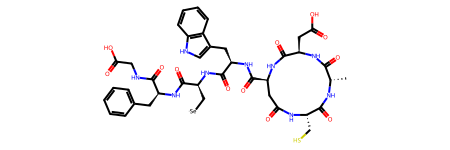

In [3]:
# read and show sdf file
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Load the SDF file
suppl = Chem.SDMolSupplier('out_special.sdf')

# Iterate over each molecule in the SDF file
for mol in suppl:
    # Check if the molecule is not None
    if mol is not None:
        # Generate the 2D coordinates for the molecule
        AllChem.Compute2DCoords(mol)
        # Display the molecule
        display(mol)
        # Draw the molecule
        Draw.MolToImage(mol)
    else:
        print("Molecule not found")

In [55]:
from rdkit import Chem
import pandas as pd

# load tsv file
df = pd.read_csv('all_sidechains.tsv', sep='\t')
df.head()


,L-Code,Name,D-Code,D-code-PDB,Molecular_weight,LogP,Sidechain_logP,Volume,Sidechain_volume,pKa,SMILES,Fixed SMILES,Pubchem#,D-Pubchem#,CAS,D-CAS,family,natural
0,ALA,Alanine,DAL,DAL,90.10,-2.85,1.09,107.08,21.42,2.35_9.87,[NH3][C@@H](C)C(=O)O,[NH3][C@@H](C)C(=O)O,5950.0,71080.0,56-41-7,338-69-2,alanine,natural
1,ARG,Arginine,DAR,DAR,176.22,-4.2,-0.05_(predicted),204.07,118.41,2.01_9.04_12.48,[NH3][C@@H](CCCNC(=[NH2])N)C(=O)O,[NH3][C@@H](CCCNC(=[NH2])N)C(=O)O,6322.0,71070.0,74-79-3,157-06-2,arginine,natural
2,ASN,Aspargine,DSG,DSG,133.13,-3.82,-1.26,142.64,56.97,2.02_8.8,[NH3][C@@H](CC(=O)N)C(=O)O,[NH3][C@@H](CC(=O)N)C(=O)O,6267.0,439600.0,70-47-3,2058-58-4,asparagine,natural
3,ASP,Aspartate,DAS,DAS,134.11,-3.68,-0.17,137.99,52.33,2.1_9.82_3.9,[NH3][C@@H](CC(=O)O)C(=O)O,[NH3][C@@H](CC(=O)O)C(=O)O,5960.0,83887.0,56-84-8,1783-96-6,aspartic,natural
4,CYS,Cysteine,DCY,DCY,122.17,-2.5,0.51_(predicted),126.70,41.04,2.05_10.25_10.78,[NH3][C@@H](CS)C(=O)O,[NH3][C@@H](CS)C(=O)O,5862.0,92851.0,52-90-4,921-01-7,cysteine,natural


In [58]:
# replace [NH3] for N in the smiles column
df['SMILES'] = df['SMILES'].str.replace(rf'[NH3]', 'N')
df['SMILES'] = df['SMILES'].str.replace(rf'[NH2]', 'N')
df['SMILES'] = df['SMILES'].str.replace(rf'[NH]', 'N')

df['SMILES'] = df['SMILES'].str.replace(rf'[C](=O)=O', f'C(=O)O')
df['SMILES'] = df['SMILES'].str.replace(rf'[C](=N)=N', f'C(=N)N')
df['SMILES'] = df['SMILES'].str.replace(rf'[C](=C(=O)O)=O)', f'C(=C(O)O)O)')
df['SMILES'] = df['SMILES'].str.replace(rf'[C](=O)', f'C(O)')
df['SMILES'] = df['SMILES'].str.replace(rf'[C](=C(=O)', f'C(=C(O)')



df['SMILES'].head()



0             N[C@@H](C)C(=O)O
1    N[C@@H](CCCNC(=N)N)C(=O)O
2       N[C@@H](CC(=O)N)C(=O)O
3       N[C@@H](CC(=O)O)C(=O)O
4            N[C@@H](CS)C(=O)O
Name: SMILES, dtype: object

In [59]:
count = 0    

for i in range(len(df)):
    # Extract the SMILES string from the DataFrame
    smiles = df['SMILES'][i]
    
    # Attempt to convert the SMILES string to a molecule
    mol = Chem.MolFromSmiles(smiles)
    # Check if the molecule is not None
    if mol is not None:
        pass
        # Generate the 2D coordinates for the molecule
    else:
        count += 1
        print(f"Molecule {count} not found for SMILES: {smiles}")
        
print(count)

Molecule 1 not found for SMILES: OC(=O)[C@H](CCC[C](=C(=O)O)=C)N
Molecule 2 not found for SMILES: C[C@H](N=C(=N)N)CC[C@@H](C(=O)O)N
Molecule 3 not found for SMILES: O[C@H](C[C@@H](C(=O)O)N)CN=C(=N)N
Molecule 4 not found for SMILES: N[C@H](C(=O)O)CN=[N]=N
Molecule 5 not found for SMILES: OC(=O)[C@H](CCCN=C(O)=N)N
Molecule 6 not found for SMILES: O=C(O)[C@H](CCN=C(=N)N)N
Molecule 7 not found for SMILES: N[C@H](C(=O)O)CN=C(=N)N
Molecule 8 not found for SMILES: N=[C](=NCCCC[C@@H](C(=O)O)N)=N
Molecule 9 not found for SMILES: OC(=O)[C@H](CCCN=[C](=S)=N)N
9


[13:29:13] Explicit valence for atom # 7 C, 5, is greater than permitted
[13:29:13] Explicit valence for atom # 3 C, 5, is greater than permitted
[13:29:13] Explicit valence for atom # 10 C, 5, is greater than permitted
[13:29:13] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:29:13] Explicit valence for atom # 8 C, 5, is greater than permitted
[13:29:13] Explicit valence for atom # 7 C, 5, is greater than permitted
[13:29:13] Explicit valence for atom # 7 C, 5, is greater than permitted
[13:29:13] Explicit valence for atom # 1 C, 6, is greater than permitted
[13:29:13] Explicit valence for atom # 8 C, 6, is greater than permitted


In [117]:
import pandas as pd
import os
from rdkit import Chem

# Create an empty DataFrame with the 'file' and 'SMILES' columns
df = pd.DataFrame(columns=['file', 'SMILES'])

# Iterate over each file in the directory 'PDB_files'
for file in os.listdir('PDB_files'):
    if file.endswith('.pdb'):
        # Extract the PDB ID from the file name
        pdb_id = file.split('.')[0]
        # Create a new DataFrame with the PDB ID and an empty SMILES string
        new_row = pd.DataFrame({'file': [pdb_id], 'SMILES': ['']})
        # Append the new row to the main DataFrame
        df = pd.concat([df, new_row], ignore_index=True)

# Iterate over each file in the directory 'PDB_files' again
for file in os.listdir('PDB_files'):
    if file.endswith('.pdb'):
        # Extract the PDB ID from the file name
        pdb_id = file.split('.')[0]
        # Load the PDB file
        mol = Chem.MolFromPDBFile(os.path.join('PDB_files', file))
        if mol is not None:
            # Generate the SMILES string for the molecule
            smiles = Chem.MolToSmiles(mol)
            # Update the SMILES string in the DataFrame for the corresponding PDB ID
            df.loc[df['file'] == pdb_id, 'SMILES'] = smiles

# Display the DataFrame
print(df)

# df where SMILES is empty
df[df['SMILES'] == '']


     file                           SMILES
0     0BN   NC(N)C1CCC(CC([NH3+])C(O)O)CC1
1    D2MF      CC1CCCCC1CC([NH3+])C([O-])O
2    DHLU            CC1COC(O)C([NH3+])C1O
3     4IN  NC1CCCC2NCC(CC([NH3+])C(O)O)C12
4    DFP8     [NH3+]C(C([O-])O)C1CCC(F)CC1
..    ...                              ...
454  D2CF     NCC1CCCCC1CC([NH3+])C([O-])O
455   DTR     [NH3+]C(CC1CNC2CCCCC12)C(O)O
456   FCL      [NH3+]C(CC1CCCC(Cl)C1)C(O)O
457  DMHO         C[SH](O)CCC([NH3+])C(O)O
458  DMEN            CNC(O)CC([NH3+])C(O)O

[459 rows x 2 columns]


,file,SMILES


In [119]:
df

,file,SMILES
0,0BN,NC(N)C1CCC(CC([NH3+])C(O)O)CC1
1,D2MF,CC1CCCCC1CC([NH3+])C([O-])O
2,DHLU,CC1COC(O)C([NH3+])C1O
3,4IN,NC1CCCC2NCC(CC([NH3+])C(O)O)C12
4,DFP8,[NH3+]C(C([O-])O)C1CCC(F)CC1
...,...,...
454,D2CF,NCC1CCCCC1CC([NH3+])C([O-])O
455,DTR,[NH3+]C(CC1CNC2CCCCC12)C(O)O
456,FCL,[NH3+]C(CC1CCCC(Cl)C1)C(O)O
457,DMHO,C[SH](O)CCC([NH3+])C(O)O
